# Book Recommendation System
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Recommendation%20System/Recommendation%20System.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Recommendation%20System/Recommendation%20System.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading in data

In [ ]:
dataset = pd.read_csv('dataset.csv',
                      encoding="utf-8",
                      delimiter=";")

In [ ]:
dataset.head()

,product,related_product,correlation
0,17894251.0,29568.0,29568.0
1,1251411.0,1171023.0,4.0
2,1251411.0,1169037.0,20.0
3,1251411.0,1171047.0,66.0
4,1251411.0,1169203.0,500.0


In [ ]:
dataset.shape

(36223, 3)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train.head()

,product,related_product,correlation
24002,1227213.0,1251820.0,35.0
17448,28399362.0,18524886.0,6.0
27419,1232398.0,17825728.0,300.0
29117,1249446.0,1249663.0,15.0
11674,1248982.0,1227283.0,11.0


In [ ]:
test.head()

,product,related_product,correlation
26921,1345602.0,1207697.0,60.0
3242,1250760.0,1232292.0,7.0
6988,1210057.0,1242851.0,302.0
32732,1238422.0,1237222.0,100.0
6133,16707796.0,1205303.0,12.0


In [ ]:
n_users = len(dataset['product'].unique())
n_users

187

In [ ]:
n_books = len(dataset['related_product'].unique())
n_books

14070

## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [ ]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 500, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 500, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [ ]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train['product'], train['related_product']], train['correlation'], epochs=3, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

Epoch 1/3


InvalidArgumentError: ignored

In [ ]:
model.evaluate([test['product'], test['related_product']], test['correlation'])

625/625 [==============================] - 1s 2ms/step - loss: 5004010.5000


5004010.5

In [ ]:
predictions = model.predict([train['product'].head(10),  test['related_product'].head(10)])

[print(predictions[i], test['correlation'].iloc[i]) for i in range(0,10)]

[0.] 10.0
[0.] 20.0
[0.] 5.0
[0.] 60.0
[0.] 5.0
[0.] 45.0
[0.] 15.0
[0.] 1.0
[0.] 15.0
[0.] 10.0


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [ ]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(512, activation='relu')(conc)
fc2 = Dense(256, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

295707/295707 [==============================] - 1280s 4ms/step - loss: 287621158748993617920.0000


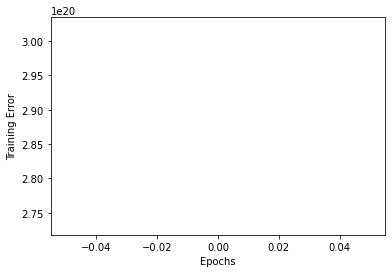

In [ ]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train['product'], train['related_product']], train['correlation'], epochs=1, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model2.evaluate([test['product'], test['related_product']], test['correlation'])

73927/73927 [==============================] - 154s 2ms/step - loss: 321962266991972581376.0000


3.219622669919726e+20

In [ ]:
predictions = model2.predict([test['product'].head(10), test['related_product'].head(10)])

[print(predictions[i], test['correlation'].iloc[i]) for i in range(0,10)]

[1316939.6] 19.0
[1316939.6] 2.0
[1316939.6] 12.0
[1316939.6] 25.0
[1316939.6] 10.0
[1316939.6] 80.0
[1316939.6] 7.0
[1316939.6] 2.0
[1316939.6] 2.0
[1316939.6] 1604.0


[None, None, None, None, None, None, None, None, None, None]

## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [ ]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
book_em_weights[:5]

array([[ 0.01685134, -0.00440135, -0.01906843, ..., -0.01266204,
        -0.04249943,  0.04622019],
       [ 0.04345444,  0.01528728, -0.03685032, ...,  0.02352199,
         0.02897705, -0.04641564],
       [-0.03990711, -0.03024866,  0.03504796, ...,  0.02259221,
         0.02948537,  0.04502121],
       [ 0.04122326,  0.03080275,  0.02052862, ..., -0.03251672,
         0.0181733 , -0.00614665],
       [-0.04204223, -0.02077011, -0.04966886, ..., -0.02376542,
        -0.03062124, -0.02455618]], dtype=float32)

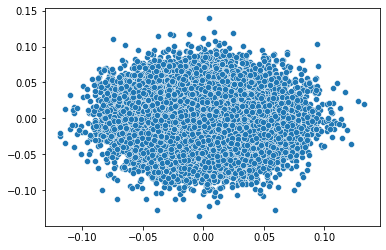

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.9999999

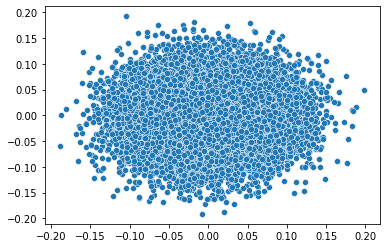

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.007s...
[t-SNE] Computed neighbors for 10001 samples in 0.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.048991
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.993668
[t-SNE] KL

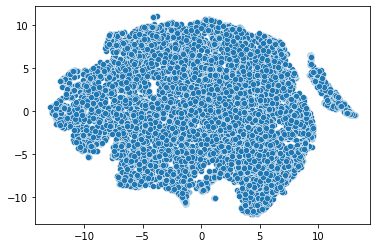

In [ ]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

## Making Recommendations

In [ ]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset['product'])))
book_data[:5]

array([20709377., 34340866., 34340867., 19590787., 34078728.])

In [ ]:
user = np.array([i for i in range(len(book_data))])
user[:5]

array([0, 1, 2, 3, 4])

In [ ]:
predictions = model.predict([get_array(test["product"]), get_array(test["related_product"])])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([      0, 1577098, 1577099, 1577100, 1577101])

In [ ]:
def get_array(series):
    return np.array([[element] for element in series])

In [ ]:
# print predicted scores
predictions[recommended_book_ids]

array([0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
books = pd.read_csv('books.csv')
books.head()

FileNotFoundError: ignored

In [ ]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
5857,5858,16297,16297,894955,171,425205959,9.780425e+12,Agatha Christie,1936.0,Cards on the Table,"Cards on the Table (Hercule Poirot, #15)",eng,3.90,19577,23004,1031,112,857,6468,9372,6195,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6245,6246,8447255,8447255,13311158,25,593046358,9.780593e+12,Steven Erikson,2011.0,The Crippled God,The Crippled God (The Malazan Book of the Fall...,eng,4.44,14472,16590,720,133,392,1553,4461,10051,https://images.gr-assets.com/books/1320388198m...,https://images.gr-assets.com/books/1320388198s...
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,The Algebraist,eng,3.99,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8231,8232,10395,10395,13106,31,60731427,9.780061e+12,Franklin Foer,2004.0,How Soccer Explains the World: An Unlikely The...,How Soccer Explains the World,NaN,3.76,9231,9944,716,246,669,2794,3715,2520,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9207,9208,22040598,22040598,41363353,18,1596435739,9.781596e+12,Scott McCloud,2015.0,The Sculptor,The Sculptor,eng,4.00,10038,10902,1789,327,655,1981,3614,4325,https://images.gr-assets.com/books/1418629570m...,https://images.gr-assets.com/books/1418629570s...
